In [5]:
from ML.EFPs.data_loaders import load_data_qg_tagging
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
import utilities.utilities as utilities

#### Loading the Dataset

In [9]:
root_data_folder = "../../../Data"
X_train, y_train = load_data_qg_tagging(
    quark_data_path=f"{root_data_folder}/Trainning/q_jets_efps_d5_primed.npy", 
    gluon_data_path=f"{root_data_folder}/Trainning/g_jets_efps_d5_primed.npy"
)
X_val, y_val = load_data_qg_tagging(
    quark_data_path=f"{root_data_folder}/Validation/q_jets_efps_d5_primed.npy", 
    gluon_data_path=f"{root_data_folder}/Validation/g_jets_efps_d5_primed.npy"
) 
best_features_set = [0, 1, 5, 6, 12, 17, 33, 42, 43, 48]

#### Creating the Boosted Decision Tree

In [50]:
# as a base estimator we use the decision tree for the quark-gluon tagging
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=250)
boosted_dt = AdaBoostClassifier(estimator=tree, learning_rate=0.5)
# trainning using only the best feature set
boosted_dt.fit(X_train[:, best_features_set], y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=5,
                                                    min_samples_split=250),
                   learning_rate=0.5)

#### Some quick checks

In [51]:
y_val_predict = boosted_dt.predict(X_val[:, best_features_set])
utilities.display_metrics(y_val, y_val_predict)

Recall: 0.7632
Precision: 0.7937
Confusion Matrix:
[[18282  4318]
 [ 5153 16609]]


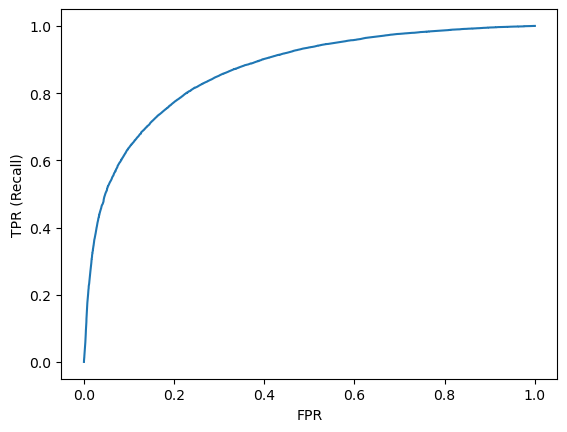

AUC: 0.8673


In [52]:
# roc curve on the validation set
y_score = boosted_dt.predict_proba(X_val[:, best_features_set])
utilities.display_roc_curve(y_val, y_score[:, 1])

#### Saving the model

In [58]:
with open("QuarkGluon_Tagging_BoostedDT.joblib", "wb") as fo:
    joblib.dump(boosted_dt, fo)